In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [5]:
#images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images
#batch size is the number of images
#shuffle=true tells to shuffle everytime when goes through data loader again
for image, label in trainloader:
    dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


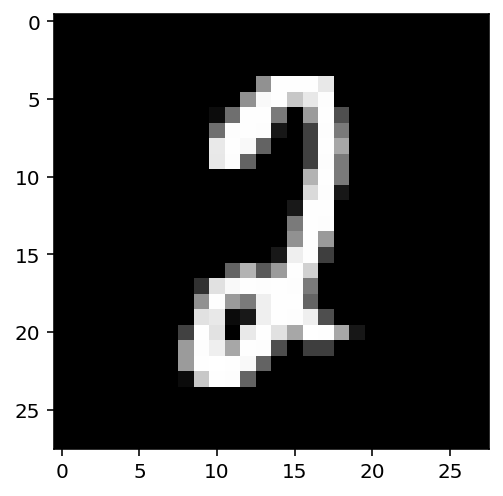

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [11]:
# we create fully connected dense networks, input to each layer must be 1D
# here input is 28x28 2D vectors which needed to be converted into 1D
#converting from (64,1,28,28) to (64,1,784)
#now we need 10 output for each digits

def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
#images.shapes[0] gives number of batches, to flatten rest of the dimension we use -1
#instead of 784 we can write -1
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
#256 bias terms
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out)

tensor([[-5.9690e+00,  5.5608e+00, -2.4082e+00,  8.5888e+00,  1.6819e+00,
         -1.7040e+00,  2.2171e-01, -5.3705e+00,  1.7915e+01,  1.0296e+01],
        [-1.5022e+01, -4.3541e+00, -3.8103e+00,  1.2520e+01,  3.1127e+00,
         -2.3693e+00,  1.2240e+00, -4.9845e+00,  1.1603e+01, -3.3307e+00],
        [-3.5245e+00,  1.0556e+00,  2.5071e+00,  1.2237e+01,  8.8085e+00,
         -7.1710e+00,  6.0240e-01, -8.5965e+00,  1.3877e+01,  9.8978e+00],
        [-8.9069e+00, -1.6459e+00,  7.2186e+00,  4.5100e+00,  1.2149e+00,
         -7.9496e+00, -5.0545e+00, -1.3589e+01,  2.2842e+01, -2.2368e+00],
        [-1.4391e+01,  8.2502e+00, -6.8092e-01,  8.9320e+00,  2.4472e+00,
         -5.0930e+00, -6.3231e+00, -5.0543e+00,  1.9167e+01,  7.7292e+00],
        [-1.2262e+01,  9.3848e+00, -1.2024e+00,  8.4383e+00, -5.3277e+00,
         -9.7237e-01, -6.4985e+00, -1.1681e+01,  1.5550e+01,  3.1091e+00],
        [-1.3051e+00,  1.3070e+00,  7.1035e+00,  1.3422e+01, -6.4791e+00,
         -1.5128e+01, -1.3620e+0

In [12]:
#softmax function squishes and normalizes such that value add up to 1
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

print(probabilities.shape)

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
